In [73]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np 
import librosa
import librosa.display
import IPython.display as ipd
import scipy.signal
import wave
import struct
import pyaudio
import threading,time

/Users/miamirkovic/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Getting started with ```librosa```

In [11]:
x, sr = librosa.load(librosa.util.example_audio_file())
print(x.shape)
print(sr)

(1355168,)
22050


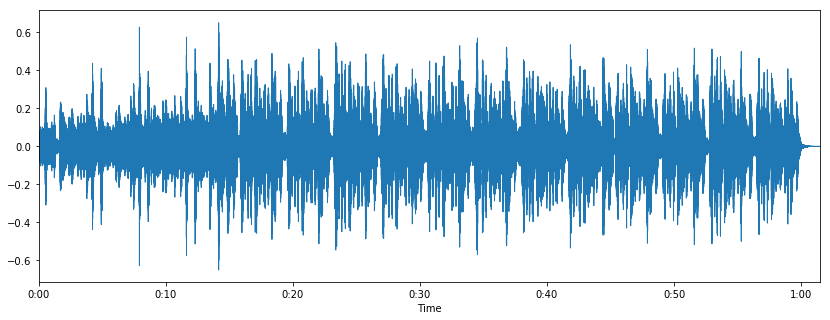

In [12]:
% matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

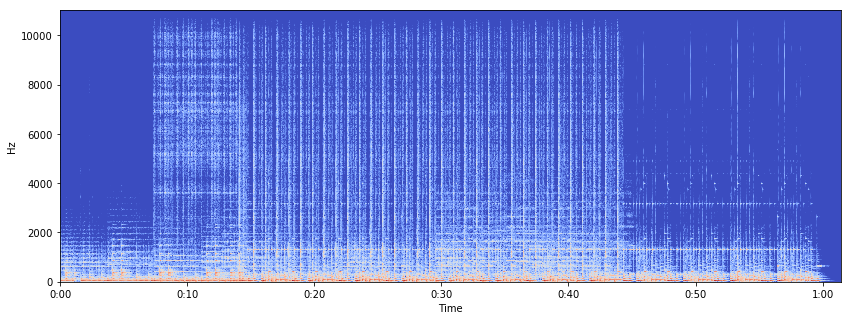

In [13]:
% matplotlib inline
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
data = lr.core.chirp(20, 20000, duration=20, linear=True)
p = pyaudio.PyAudio
def play_audio(data, p, fs):
    # play_audio plays audio with sampling rate = fs
    # data - audio data array
    # p    - pyAudio object
    # fs    - sampling rate
    # 
    # Example:
    # fs = 44100
    # p = pyaudio.PyAudio() #instantiate PyAudio
    # play_audio( data, p, fs ) # play audio
    # p.terminate() # terminate pyAudio
    
    # open output stream
    ostream = p.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),output=True)
    # play audio
    ostream.write(data.astype(np.float32).tostring())
    


In [51]:
input_file = "war_and_peace.txt"
f = open(input_file, "r")

def canonical_samp(n, file):
    """
    Returns a sample of the first n lines of the text.
    n: number of lines to be included in sample
    file: file path as a string
    """
    # CODE HERE
    st = ''
    with open(file, 'r') as f:
        for _ in range(n):
            line = f.readline()
            st = st+line
    return st
    
s = canonical_samp(10, input_file)
print(s)
def sample_text(n, file):
    """
    Returns a sample of n consecutive lines from the specified text file.
    
    n: number of lines of text to be included in sample
    file: file path as a string
    """
    # CODE HERE
    return None

def build_freq_arr(st):
    """
    TAKEN FROM LAB4 AND SIMPLIFIED
    Builds a matrix that represents the transitional
    probabilities between letters in input_file.
    
    bigram_freq_matrix[0][1] is the probability of
    transitioning from the 0th letter of the alphabet
    to the 1st letter of the alphabet, where letters
    are zero-indexed. ' ' (space) is denoted as the
    26th letter of the alphabet.
    """
    counts = np.ones([27])
    for i in range(len(st) - 1):
        ch = ord(st[i].upper()) - 65 if st[i].isalpha() else 26
        counts[ch] += 1
    freq_arr = (counts.T / np.sum(counts))
    return freq_arr.tolist()

arr = build_freq_arr(s)
print(arr)

from heapq import heappush, heappop, heapify
def huff(st):
    """
    Huffman encode the given dict mapping symbols to weights
    """
    heap = [[arr[i], [i, ""]] for i in range(len(st))]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
    
h = huff(arr)
print(h)
print(sorted([e[0] for e in h]))

def heap2dicts(enc_heap):
    enc_dict = {}
    dec_dict = {}
    for elem in enc_heap:
        enc_dict[elem[0]] = elem[1]
        dec_dict[elem[1]] = elem[0]
    enc_dict[27] = ""
    return enc_dict, dec_dict

ed, dd = heap2dicts(h)
print(ed, dd)

def huffenc(enc_dict, st):
    """
    generates huffman encoding of string
    """
    enc_st = ""
    for i in range(len(st)-1):
        ch = ord(st[i].upper()) - 65 if st[i].isalpha() else 26
        enc_st = enc_st+ enc_dict.get(ch, 27)
    return str(enc_st)

est = huffenc(ed, s)
print(est)

def ind2str(ind):
    """
    returns the length-1 string corresponding to the index ind
    """
    ch = chr(ind+65) if ind < 26 else " "
    return ch
    
    
def huffdec(dec_dict, st):
    """
    decodes huffman-encoded string
    """
    dec_st = ""
    ks = dec_dict.keys()
    i = 0
    j = 1
    while j <= len(st): 
        k = st[i:j]
        if k in ks:
            dec_st = dec_st+ind2str(dec_dict[k])
            i = j
            j += 1
        else:
            j+=1
    return dec_st

huffdec(dd, est)

﻿
The Project Gutenberg EBook of War and Peace, by Leo Tolstoy

This eBook is for the use of anyone anywhere at no cost and with almost
no restrictions whatsoever. You may copy it, give it away or re-use
it under the terms of the Project Gutenberg License included with this
eBook or online at www.gutenberg.org


Title: War and Peace

[0.04709141274238227, 0.0221606648199446, 0.027700831024930747, 0.019390581717451522, 0.10526315789473684, 0.013850415512465374, 0.024930747922437674, 0.030470914127423823, 0.0443213296398892, 0.008310249307479225, 0.0110803324099723, 0.0221606648199446, 0.0110803324099723, 0.04986149584487535, 0.08033240997229917, 0.01662049861495845, 0.002770083102493075, 0.05263157894736842, 0.038781163434903045, 0.08033240997229917, 0.024930747922437674, 0.008310249307479225, 0.030470914127423823, 0.002770083102493075, 0.024930747922437674, 0.002770083102493075, 0.19667590027700832]
[[26, '00'], [4, '011'], [13, '0100'], [14, '1100'], [17, '1000'], [19, '1101'], [0, '1

'  THE PROJECT GUTENBERG EBOOK OF WAR AND PEACE  BY LEO TOLSTOY  THIS EBOOK IS FOR THE USE OF ANYONE ANYWHERE AT NO COST AND WITH ALMOST NO RESTRICTIONS WHATSOEVER  YOU MAY COPY IT  GIVE IT AWAY OR RE USE IT UNDER THE TERMS OF THE PROJECT GUTENBERG LICENSE INCLUDED WITH THIS EBOOK OR ONLINE AT WWW GUTENBERG ORG   TITLE  WAR AND PEACE'

/Users/miamirkovic/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


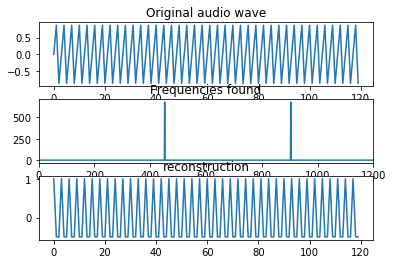

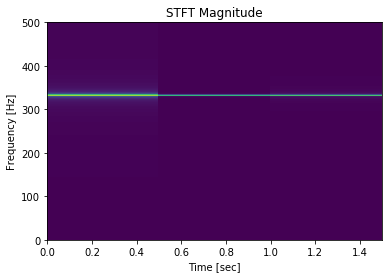

In [68]:
f0 = 10000
f1 = 3500
noisy_freq = 500
tx_file = "tx.wav"

dur=10
num_samples = dur*len(est)
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 30000
 
amplitude = 16000

# right now, we assume that we only take one sample per bit. 
# this will not be adequate once we actually start transmitting and receiving.
def freq(x, f0, f1):
    if x == 1: 
        return f1
    else: 
        return f0



sine_wave = []
while i < num_samples:
    if i%dur == 0:
        
        sine_wave.append(np.sin(2 * np.pi * freq(est[i], f0, f1) * i/sampling_rate))
    else:
        
    
sine_wave = [np.sin(2 * np.pi * freq(est[i], f0, f1) * i/sampling_rate) for i in range(num_samples)]
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
sine_rs = scipy.signal.resample(sine_wave, num_samples*10)
plt.plot(sine_wave[:80])
w = np.array(sine_wave)
w_rs = np.array(sine_rs)
n = np.array(sine_noise)
combined = w+n
w_ft = np.fft.fft(w)
w_rs_ft=np.fft.fft(w)
c_ft = np.fft.fft(combined)
frequencies = np.abs(w_ft)

plt.subplot(3,1,1)
 
plt.plot(w[:120])
 
plt.title("Original audio wave")
 
plt.subplot(3,1,2)
 
plt.plot(frequencies)
 
plt.title("Frequencies found")
 
plt.xlim(0,1200)

plt.subplot(3,1,3)
 
plt.plot(np.fft.ifft(frequencies)[:120])
 
plt.title("reconstruction")

plt.show()

f, t, Zxx = scipy.signal.stft(w, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.2)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

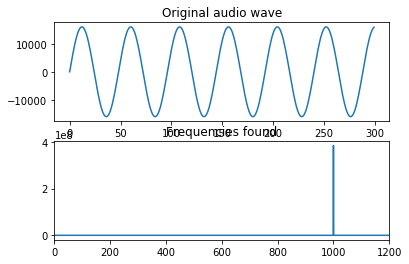

In [33]:



# http://pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/
# test driving

frequency = 1000

num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000
 
file = "test.wav"

sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1
 
sampwidth=2

wav_file=wave.open(file, 'w')
 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

for s in sine_wave:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))
    

frame_rate = 48000.0
 
infile = "test.wav"
 
num_samples = 48000
 
wav_file = wave.open(infile, 'r')
 
data = wav_file.readframes(num_samples)
 
wav_file.close()

data = struct.unpack('{n}h'.format(n=num_samples), data)

data = np.array(data)

data_fft = np.fft.fft(data)

frequencies = np.abs(data_fft)

plt.subplot(2,1,1)
 
plt.plot(data[:300])
 
plt.title("Original audio wave")
 
plt.subplot(2,1,2)
 
plt.plot(frequencies)
 
plt.title("Frequencies found")
 
plt.xlim(0,1200)
 
plt.show()
def generate_sig(str):
    """
    Builds audio array for playback.
    """
    
    return None

In [79]:
# gracias ee123
# https://inst.eecs.berkeley.edu/~ee123/sp14/lab/lab1-Time_Domain_II_Sonar.html

def play_audio( data, p, fs):
    # play_audio plays audio with sampling rate = fs
    # data - audio data array
    # p    - pyAudio object
    # fs    - sampling rate
    # 
    # Example:
    # fs = 44100
    # p = pyaudio.PyAudio() #instantiate PyAudio
    # play_audio( data, p, fs ) # play audio
    # p.terminate() # terminate pyAudio
    
    # open output stream
    ostream = p.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),output=True)
    # play audio
    ostream.write( data.astype(np.float32).tostring() )
    
    
def record_audio( odata, p, fs, record_seconds ):
    # record_audio records audio with sampling rate = fs
    # odata - output data
    # p     - pyAudio object
    # fs    - sampling rate
    # record_seconds - record seconds
    #
    # Example:
    # fs = 44100
    # record_seconds = 5
    # odata = zeros( fs * record_seconds ) # initialize odata
    # p = pyaudio.PyAudio() #instantiate PyAudio
    # record_audio( odata, p, fs, record_seconds ) # play audio
    # p.terminate() # terminate pyAudio
    
    # open input stream
    chunk = 1024
    istream = p.open(format=pyaudio.paFloat32, channels=1, rate=int(fs),input=True,frames_per_buffer=chunk)

    # record audio in chunks and append to frames
    frames = [];
    for i in range(0, int(fs / chunk * record_seconds)):
        data_str = istream.read(chunk) # read a chunk of data
        data_flt = np.fromstring( data_str, 'float32' ) # convert string to float
        frames.append( data_flt ) # append to list
        
    # flatten list to array
    data = np.concatenate( frames )
    # copy to output
    np.copyto(odata[0:len(data)], data)

def xciever(ptrain, fs):
    # function takes a pulse train and a sampling frequency
    # it then plays and records at the same time. The function returns
    # the recorded sound. 
    
    
    RECORD_SECS = np.float32(len(ptrain))/fs + 1.0
    # allocate receive signal for signal  + 1 second
    rcv_sig = np.zeros( len(ptrain) + fs );

    # instantiate PyAudio
    p = pyaudio.PyAudio()
    
    # initialize threads
    t_play = threading.Thread(   target = play_audio,   args = (ptrain,   p, fs,  ))
    t_record = threading.Thread( target = record_audio, args = (rcv_sig, p, fs, RECORD_SECS , ))

    # start recording and playing threads
    
    t_record.start()
    t_play.start()
    

    # pause for Tplay+1 seconds
    time.sleep( RECORD_SECS+1)

    # terminate pyAudio
    p.terminate()
    return rcv_sig

sig = librosa.core.chirp(20, 20000, duration=20, linear=True)
r_sig = xciever(sig, 50000)

In [82]:
print([i for i in list(r_sig)[::50000] if i != 0])

[-0.09706173837184906, -0.026716597378253937, -0.081669002771377563, 0.00020698188745882362, 0.002334454795345664, 0.015498710796236992, -0.10946933925151825, -0.015594149939715862, 0.00073763600084930658]
